In [49]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [50]:
def euc_dist(a,b):
    return np.sqrt(((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2)).round(3)

def manhatan_dist(a,b):
    return ((abs(a[0]-b[0]) + abs(a[1]-b[1]) + abs(a[2]-b[2])))

In [51]:
a = (3,1,4)
b = (-1,2,0)
c = (3,-4,-2)

In [52]:
euc_dist(a,b),manhatan_dist(a,b)

(5.745, 9)

In [53]:
euc_dist(a,c),manhatan_dist(a,c)

(7.81, 11)

In [54]:
euc_dist(c,b),manhatan_dist(c,b)

(7.483, 12)

In [55]:
-1/(np.sqrt(26)*np.sqrt(5))

-0.08770580193070293

## Chebyshev

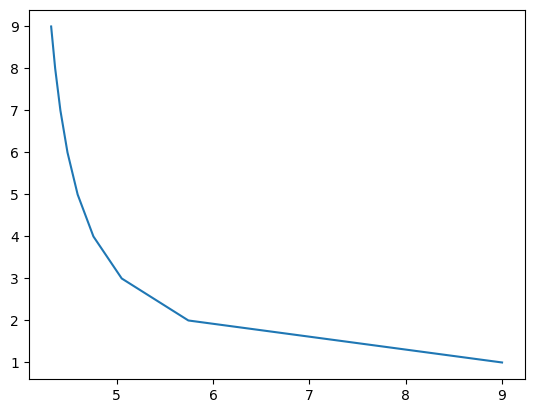

In [56]:
num = []
res = []

for i in range(1,10):
    ress = ((abs(a[0]-b[0])**i + abs(a[1]-b[1])**i + abs(a[2]-b[2])**i)**(1/i))
    num.append(i)
    res.append(ress)
plt.plot(res,num)
plt.show()

In [57]:
-3/(np.sqrt(26)*np.sqrt(29))

-0.10925355610938448

## Day3 notebook

In [119]:
# load the csv file
# store the data in 'df_cancer'
df = pd.read_csv('Admission_Predict.csv')
x = df.drop('Chance of Admit',axis = 1)
y = df['Chance of Admit']

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

#

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

## KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
knn = KNeighborsClassifier(n_neighbors = 7,p = 1)
knn.fit(xtrain_sc, ytrain)
ypred_knn = knn.predict(xtest_sc)
print(confusion_matrix(ytest,ypred_knn))
print(accuracy_score(ytest, ypred_knn))
print('Train Score',knn.score(xtrain_sc,ytrain))


[[38  5]
 [ 5 32]]
0.875
Train Score 0.884375


In [138]:
knn = KNeighborsClassifier(n_neighbors=3,p = 1)
knn.fit(xtrain_sc, ytrain)

ypred_knn = knn.predict(xtest_sc)

print(confusion_matrix(ytest,ypred_knn))
print(accuracy_score(ytest, ypred_knn))
print('Train Score',knn.score(xtrain_sc,ytrain))


[[38  5]
 [ 5 32]]
0.875
Train Score 0.91875


In [131]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)
sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3,4,7],
    'p': [1,2]
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')  # You can adjust the number of cross-validation folds (cv) as needed
grid_search.fit(xtrain_sc, ytrain)

# Get the best estimator and its parameters
best_params = grid_search.best_params_

# Print the best parameters and accuracy
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 7, 'p': 1}


In [133]:
#without weight
knn = KNeighborsClassifier(n_neighbors=3,p = 2)
knn.fit(xtrain_sc, ytrain)

ypred_knn = knn.predict(xtest_sc)

print(confusion_matrix(ytest,ypred_knn))
print(accuracy_score(ytest, ypred_knn))
print('Train Score',knn.score(xtrain_sc,ytrain))


[[38  5]
 [ 4 33]]
0.8875
Train Score 0.91875


In [115]:
#with weight
knn = KNeighborsClassifier(n_neighbors=3,p = 2,weights='distance')
knn.fit(xtrain_sc, ytrain)

ypred_knn = knn.predict(xtest_sc)

print(confusion_matrix(ytest,ypred_knn))
print(accuracy_score(ytest, ypred_knn))


[[38  5]
 [ 4 33]]
0.8875


In [117]:
print(knn.score(xtrain_sc,ytrain))

1.0


In [118]:
print(knn.score(xtest_sc,ytest))

0.8875


### Naive Bayes Theorem

In [161]:
df = pd.read_csv('Admission_Predict.csv')
x = df.drop('Chance of Admit',axis = 1)
y = df['Chance of Admit']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [162]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [163]:
model = GaussianNB()
model.fit(xtrain, ytrain)

ypred_knn = model.predict(xtest)

print(confusion_matrix(ytest,ypred_knn))
print(accuracy_score(ytest, ypred_knn))


[[40  3]
 [ 5 32]]
0.9


In [164]:
model = BernoulliNB()
model.fit(xtrain, ytrain)

ypred_knn = model.predict(xtest)

print(confusion_matrix(ytest,ypred_knn))
print(accuracy_score(ytest, ypred_knn))


[[28 15]
 [ 6 31]]
0.7375


In [165]:
model = MultinomialNB()
model.fit(xtrain, ytrain)

ypred_knn = model.predict(xtest)

print(confusion_matrix(ytest,ypred_knn))
print(accuracy_score(ytest, ypred_knn))


[[25 18]
 [23 14]]
0.4875
